In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [98]:
COLOR_GRAPHS_BLUEVIOLET = 'blueviolet'
COLOR_GRAPHS_SLATEBLUE = 'slateblue'
COLOR_GRAPHS_GOLD = 'gold'
COLOR_GRAPHS_KHAKI = 'khaki'
COLOR_GRAPHS_BLACK = 'black'

In [67]:
from bcb import sgs

CODIGO_TRANSACOES_CORRENTES = 23461

#datetime
start_date = '2020-01-01'
end_date = '2025-12-31'

transacoes_correntes = sgs.get({'saldo': CODIGO_TRANSACOES_CORRENTES})

df_transaction = pd.DataFrame(transacoes_correntes)
df_yearly = df_transaction.resample('Y').last()

df_yearly['diff_year'] = df_yearly['saldo'].diff()
df_yearly['yy_change'] = df_yearly['diff_year'] / df_yearly['saldo'].shift(1)

#percentual variation 

df_yearly['pct_change (%)'] = df_yearly['yy_change'].pct_change() * 100
df_yearly['pct_change (%)'] = df_yearly['pct_change (%)'].__round__(2)

df_yearly

/tmp/ipykernel_3346/2515169954.py:12: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



,saldo,diff_year,yy_change,pct_change (%)
Date,,,,
1995-12-31,-18712.4,NaN,NaN,NaN
1996-12-31,-23843.0,-5130.6,0.274182,NaN
1997-12-31,-32133.4,-8290.4,0.347708,26.82
1998-12-31,-34992.9,-2859.5,0.088988,-74.41
1999-12-31,-26783.6,8209.3,-0.234599,-363.63
2000-12-31,-26530.8,252.8,-0.009439,-95.98
2001-12-31,-24890.1,1640.7,-0.061841,555.20
2002-12-31,-9407.0,15483.1,-0.622059,905.89
2003-12-31,2193.2,11600.2,-1.233146,98.24


*Analisando Saldo do Brasil em Transações Correntes*

O gráfico ilustra a variação percentual dos anos (y/y) (Ano atual - Ano_anterior) / Ano_anterior
E também o volume de cada ano, com o saldo sendo em grande maioria negativo, mostrando todo o processo de transações correntes nas contas brasileiras

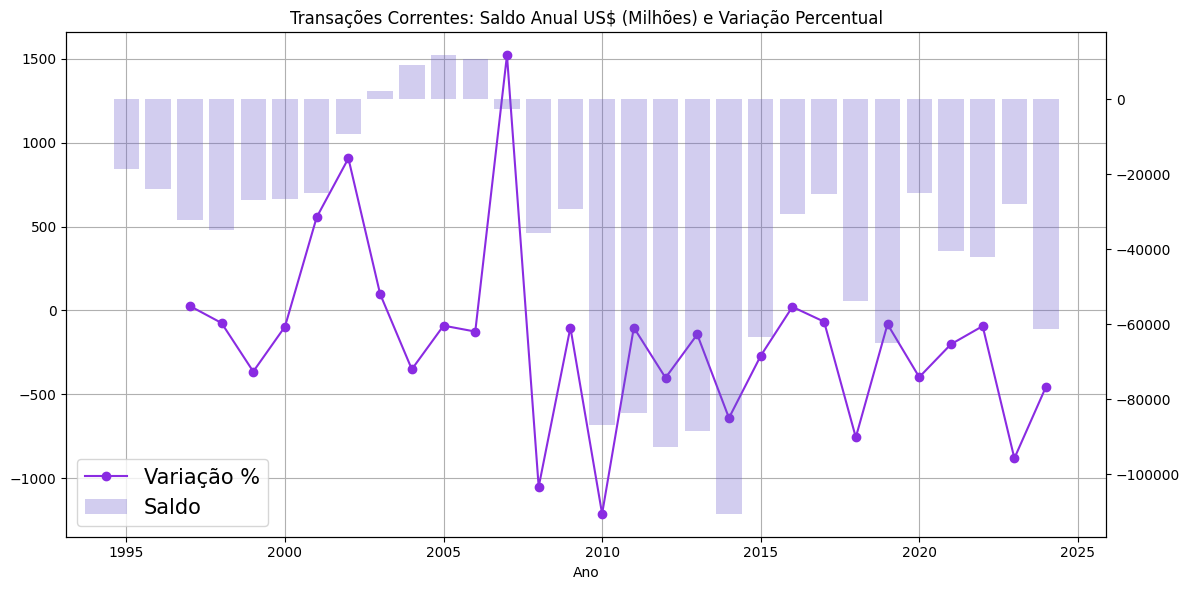

In [102]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_yearly.index.year, df_yearly['pct_change (%)'], marker='o', color=COLOR_GRAPHS_BLUEVIOLET, label='Variação %')
ax1.set_xlabel('Ano')

ax2  = ax1.twinx()

ax2.bar(df_yearly.index.year, df_yearly['saldo'], alpha=0.3, color=COLOR_GRAPHS_SLATEBLUE, label='Saldo')

plt.title('Transações Correntes: Saldo Anual US$ (Milhões) e Variação Percentual')
ax1.grid(True)

lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc='lower left', fontsize=15)

plt.tight_layout()
plt.show()

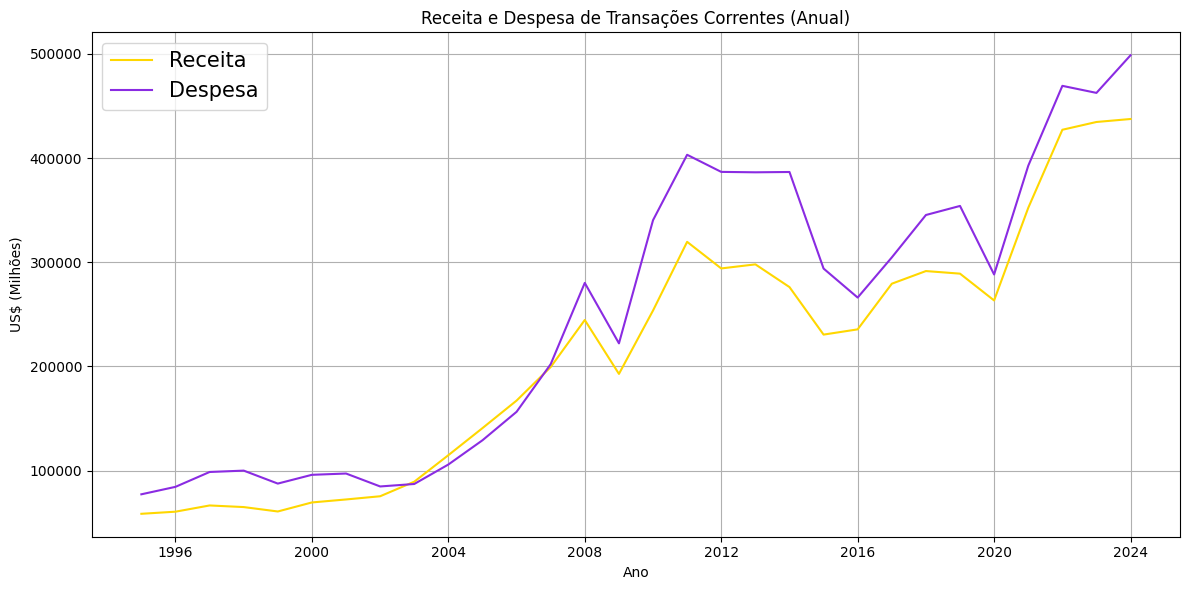

In [103]:
DIFERENCA_RECEITA_DESPESA = {
    'tc_receita': 23462,
    'tc_despesa': 23463
}


tc_despesa_receita = sgs.get(DIFERENCA_RECEITA_DESPESA)
tc_despesa_receita

df_rd = pd.DataFrame(tc_despesa_receita)
df_rd['diff'] = df_rd['tc_receita'] - df_rd['tc_despesa']

plt.figure(figsize=(12, 6))
plt.plot(df_rd.index, df_rd['tc_receita'], label='Receita', color=COLOR_GRAPHS_GOLD)
plt.plot(df_rd.index, df_rd['tc_despesa'], label='Despesa', color=COLOR_GRAPHS_BLUEVIOLET)

plt.title('Receita e Despesa de Transações Correntes (Anual)')
plt.xlabel('Ano')
plt.ylabel('US$ (Milhões)')
plt.legend(fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.show()